# Übungsaufgabe Ausgleichsrechnung

Es ist eine Ausgleichsrechnung über Normalengleichungen vorzunehmen, um Regressionsparameter zu fitten.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Daten laden und darstellen

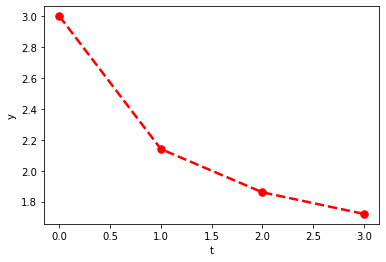

In [2]:
t, y = np.loadtxt('messung.dat', delimiter=',', skiprows=1, unpack=True)

# daten anzeigen
plt.figure()
plt.plot(t, y, 'r--', lw=2.5, marker='.', markersize=15)
plt.xlabel('t')
plt.ylabel('y');

Es wird angenommen, dass die Daten folgener Gesetzmäßigkeit unterliegen:
$$y = f(t) = \alpha \frac{1}{1 + t} + \beta$$

Zu bestimmende Parameter $\alpha$ und $\beta$ bilden Ergebnisvektor $x$.

Größe der Koeffizientenmatrix $A$: \[Anzahl an Daten; Anzahl an Parameter\]

In [3]:
A = np.ones((len(t), 2))
A[:, 0] = 1/(1+t)

In [4]:
A[:, 0].shape
rhs = np.dot(np.transpose(A), y)

(4,)

Normalengleichungen aufstellen:
$$A^TAx = A^Ty$$

In [5]:
rhs = np.dot(A.T, y)
lhs = np.dot(A.T, A)

Lösen der Gleichung mittels Inverse

In [6]:
x = np.dot(np.linalg.inv(lhs), rhs)
alpha = x[0]
beta = x[1]
# alpha, beta = x
print(alpha, beta)

1.7083076923076916 1.2902564102564105


In [12]:
(a11, a12), (a21, a22), (a31, a32), (a41, a42) = A
a1, a2, a3, a4 = A

Ergebnis darstellen

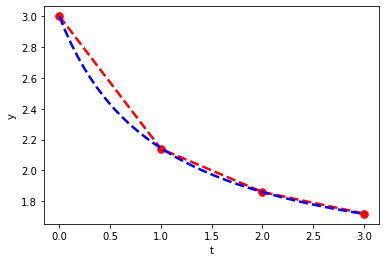

In [13]:
tn = np.linspace(min(t), max(t))
fm = alpha*(1/(1+tn)) + beta
plt.figure()
plt.plot(t, y, 'r--', lw=2.5, marker='.', markersize=15)
plt.plot(tn, fm, 'b--', lw=2.5)
plt.xlabel('t')
plt.ylabel('y');

Fehler zu den beobachteten Daten berechnen

In [14]:
fe = alpha*(1/(1+t)) + beta
print(fe)
print(y)

[2.9985641  2.14441026 1.85969231 1.71733333]
[3.   2.14 1.86 1.72]


Scipy.Optimize curve_fit

In [15]:
def func(t, alpha, beta):
    return alpha*(1/(1+t))+beta

popt, pcov = curve_fit(func, t, y)
alpha1 = popt[0]
beta1 = popt[1]
print(alpha1, beta1)

1.7083076922566676 1.2902564102912772


In [16]:
fe1 = alpha1*(1/(1+t)) + beta1
print(fe1)
print(y)

[2.9985641  2.14441026 1.85969231 1.71733333]
[3.   2.14 1.86 1.72]


In [16]:
err = np.linalg.norm(fe-y)
err1 = np.linalg.norm(fe1-y)
print(err, err1)

0.005358913016456568 0.005358913016456564
